<a href="https://colab.research.google.com/github/FebruArdiansyah/UAS_ARTIFICIAL_INTELEGENCE/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY DAN ALGORITMA MACHINE LEARNING
DISINI SAYA MEMAKAI K-MEANS UNTUK CLUSTERING NYA DAN RANDOM FOREST UNTUK PELATIHAN MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **Langkah 1: Preprocessing Data**
*   Mengecek keberadaan file CSV sebelum membaca data.
*   Jika file tidak ditemukan, program akan menampilkan error.


In [ ]:
file_path = "/content/sample_data/netflix_titles.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File tidak ditemukan: {file_path}")

df = pd.read_csv(file_path)

# 1. Menghapus baris dengan nilai kosong (missing values) pada kolom penting:
* release_year: Tahun rilis konten.
* duration: Durasi konten (dalam format teks, seperti "120 min").
* type: Jenis konten (Movie atau TV Show).

# 2. Mengubah Format Durasi
* Menjadikan durasi sebagai angka (contoh: "120 min" → 120).

# 3. Menormalisasi Data
* Melakukan normalisasi data agar memiliki skala yang sama menggunakan StandardScaler(), karena K-Means berbasis jarak sensitif terhadap skala fitur.

In [ ]:
df_cleaned = df.dropna(subset=['release_year', 'duration', 'type']).copy()

df_cleaned['duration_num'] = df_cleaned['duration'].str.extract('(\d+)').astype(float)

features = ['release_year', 'duration_num']
df_numeric = df_cleaned[features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# **Langkah 2: Clustering dengan K-Means**

# 1. Menentukan Jumlah Optimal Cluster dengan Elbow Method
* Variabel inertia digunakan untuk menyimpan nilai inertia setiap iterasi.
* Loop for k in K_range mencoba berbagai nilai K (jumlah klaster) dari 1 hingga 9.
* KMeans dijalankan untuk setiap k dengan parameter:
* n_clusters=k: Menentukan jumlah klaster.
* random_state=42: Agar hasil eksperimen tetap konsisten.
* n_init=10: Menjalankan K-Means sebanyak 10 kali dengan centroid yang berbeda dan memilih hasil terbaik.
* Hasil inertia disimpan dalam list inertia untuk melihat seberapa baik clustering dilakukan.

# 2. Visualisasi Elbow Method
* Membuat plot antara Jumlah Klaster (K) vs Inertia.
* Garis plt.plot(K_range, inertia, marker='o') menggambarkan perubahan nilai inertia untuk setiap jumlah klaster.
* Titik "elbow" (sudut tajam di grafik) menunjukkan K optimal, yaitu ketika penurunan inertia mulai melambat.

# 3. Menjalankan K-Means dengan K Optimal
* Menggunakan nilai K yang dipilih (optimal_k = 3).
* Menjalankan KMeans dengan n_clusters=3.
* Hasil clustering disimpan di kolom baru df_cleaned['cluster'].

# 4. Visualisasi Hasil Clustering
* Scatter plot dibuat untuk melihat hasil clustering.
* Warna mewakili klaster yang berbeda (c=df_cleaned['cluster']).
* cmap='viridis' digunakan sebagai warna gradasi untuk memperjelas pemisahan klaster.
* plt.colorbar() menambahkan legenda warna untuk setiap klaster.

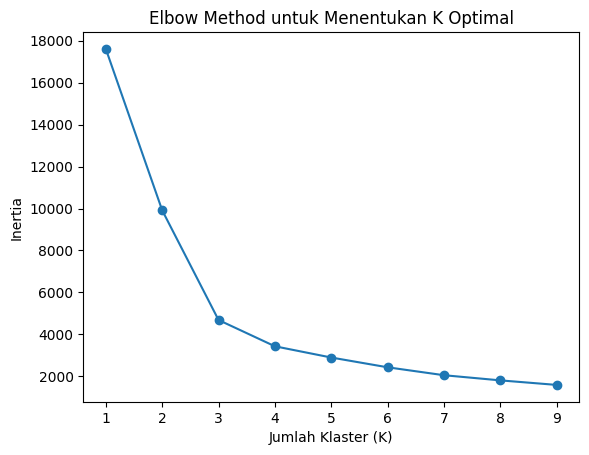

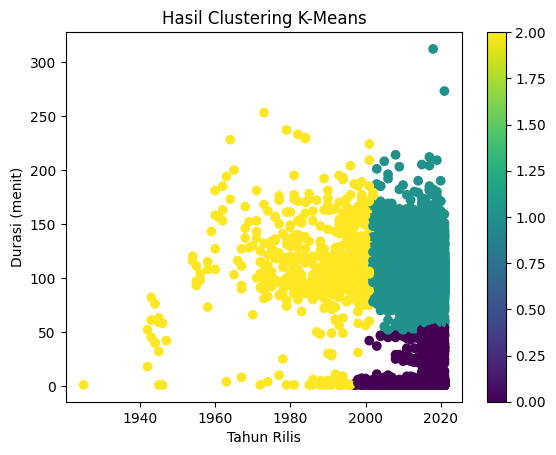

In [ ]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(df_scaled)

plt.scatter(df_numeric['release_year'], df_numeric['duration_num'], c=df_cleaned['cluster'], cmap='viridis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Durasi (menit)')
plt.title('Hasil Clustering K-Means')
plt.colorbar()
plt.show()


 # **Langkah 3: Machine Learning dengan Random Forest**
 # 1. Menyiapkan Data untuk Model ML
* Menggunakan hasil clustering (cluster) sebagai fitur tambahan.
* Membuat label (y) untuk klasifikasi:
Movie = 1
TV Show = 0

# 2. Membagi Data Latih & Data Uji
* Membagi dataset menjadi 80% training dan 20% testing.

# 3. Melatih Model Random Forest
* Menggunakan RandomForestClassifier dengan 100 pohon keputusan (n_estimators=100).

# 4. Evaluasi Model
* Mengukur akurasi model dan menampilkan laporan klasifikasi.



In [ ]:
df_ml = df_cleaned[['release_year', 'duration_num', 'cluster']]
y = (df_cleaned['type'] == 'Movie').astype(int)

X_train, X_test, y_train, y_test = train_test_split(df_ml, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Akurasi Model dengan Clustering:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi (dengan clustering):")
print(classification_report(y_test, y_pred))

Akurasi Model dengan Clustering: 0.9982964224872232
Laporan Klasifikasi (dengan clustering):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       566
           1       1.00      1.00      1.00      1195

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761



# **Langkah 4: Hyperparameter Tuning**

# 1. Mendefinisikan Hyperparameter untuk Dicoba
* n_estimators → Jumlah pohon keputusan dalam Random Forest.
Dicoba dengan nilai 50, 100, dan 200.
* max_depth → Kedalaman maksimum setiap pohon keputusan.
Dicoba dengan None (tidak dibatasi), 10, dan 20.
* min_samples_split → Jumlah sampel minimum untuk membagi node dalam pohon.
Dicoba dengan 2, 5, dan 10.

# 2. Melakukan Grid Search dengan Cross-Validation
* Data latih dibagi menjadi 5 subset (folds).
* Model dilatih pada 4 subset dan diuji pada 1 subset, lalu berulang hingga semua subset telah digunakan sebagai validasi.
* Akurasi rata-rata dari 5 percobaan dihitung untuk setiap kombinasi parameter.
* Model terbaik dipilih berdasarkan akurasi (scoring='accuracy').

# 3. Menampilkan Hasil Terbaik
* grid_search.best_params_ → Menampilkan kombinasi parameter terbaik yang menghasilkan akurasi tertinggi.
* grid_search.best_score_ → Menampilkan akurasi terbaik setelah cross-validation.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_search.best_params_)
print("Best Accuracy (Cross-Validation):", grid_search.best_score_)


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy (Cross-Validation): 0.9978702254984192


# **Langkah 5: Perbandingan Model dengan dan Tanpa Clustering**

* Menyiapkan Dataset Tanpa Fitur Clustering
* Membagi Data Menjadi Data Latih & Uji
* Melatih Model Random Forest Tanpa Clustering
* Memprediksi Data Uji
* Mengukur Akurasi Model Tanpa Clustering

In [ ]:
df_no_cluster = df_cleaned[['release_year', 'duration_num']]
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(df_no_cluster, y, test_size=0.2, random_state=42)

model_nc = RandomForestClassifier(n_estimators=100, random_state=42)
model_nc.fit(X_train_nc, y_train_nc)

y_pred_nc = model_nc.predict(X_test_nc)
print("Akurasi Model Tanpa Clustering:", accuracy_score(y_test_nc, y_pred_nc))

Akurasi Model Tanpa Clustering: 0.9982964224872232
